In [115]:
%matplotlib inline
import matplotlib.pyplot as plt

import os
import numpy as np

from skimage import io

from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift, estimate_bandwidth

import glob

In [117]:
data = os.listdir("image_samples_resized")

In [118]:
newlist = []
for photos in data:
    if photos.endswith(".jpg"):
        newlist.append(photos)
print(newlist)

['urban_w_1_resized.jpg', 'animal_7_resized.jpg', 'promo_9_resized.jpg', 'object_7_resized.jpg', 'meme_7_resized.jpg', 'building_6_resized.jpg', 'quote_5_resized.jpg', 'candid_8_resized.jpg', 'selfie_1_resized.jpg', 'art_4_resized.jpg', 'landscape_w_5_resized.jpg', 'food_4_resized.jpg', 'body_6_resized.jpg', 'selfie_8_resized.jpg', 'candid_1_resized.jpg', 'urban_wo_4_resized.jpg', 'group_5_resized.jpg', 'art_1_resized.jpg', 'promo_5_resized.jpg', 'urban_wo_1_resized.jpg', 'candid_4_resized.jpg', 'quote_9_resized.jpg', 'body_3_resized.jpg', 'food_1_resized.jpg', 'object_2_resized.jpg', 'meme_2_resized.jpg', 'landscape_wo_2_resized.jpg', 'animal_2_resized.jpg', 'art_8_resized.jpg', 'urban_w_4_resized.jpg', 'selfie_4_resized.jpg', 'group_9_resized.jpg', 'food_8_resized.jpg', 'building_3_resized.jpg', 'body_9_resized.jpg', 'selfie_7_resized.jpg', 'quote_3_resized.jpg', 'animal_1_resized.jpg', 'object_1_resized.jpg', 'meme_1_resized.jpg', 'landscape_wo_1_resized.jpg', 'food_2_resized.jpg', 

In [119]:
# get list of images
#img = glob.glob("image_sample_copy/animal_images/*.jpg")

img = []
for d in newlist:
    img.append(io.imread("image_samples_resized/" +d).mean(axis=2).flatten())

In [120]:
img = np.array(img)
img.shape

(138, 51623)

In [121]:
img

array([[ 69.66666667,  63.        ,   4.66666667, ...,  66.66666667,
         82.        , 127.33333333],
       [149.66666667, 160.66666667, 153.66666667, ...,  47.        ,
         45.        ,  50.66666667],
       [ 43.        ,  43.        ,  43.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [173.33333333, 139.66666667,  57.66666667, ..., 111.        ,
         84.        ,  39.        ],
       [234.        , 234.        , 234.        , ..., 242.        ,
        241.        , 244.        ],
       [ 32.33333333,  17.        ,  24.66666667, ..., 108.66666667,
         39.33333333,  45.33333333]])

In [122]:
m,n = 209,247

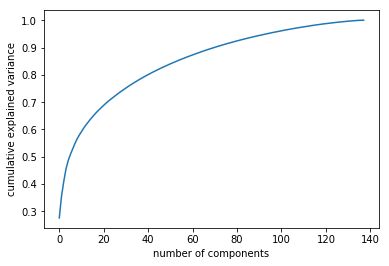

In [123]:
pca = PCA().fit(img)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [124]:
sklearn_pca = PCA(n_components=30)
Y_sklearn = sklearn_pca.fit_transform(img)

In [125]:
sklearn_pca.components_.shape

(30, 51623)

In [126]:
Y_sklearn

array([[  5371.24029804,  -1346.606966  ,   -725.21657918, ...,
           467.37680948,    -83.57775319,  -2135.3158454 ],
       [ -5075.53642814,  -2585.0254426 ,  -2586.35197999, ...,
           270.00921309,    -24.09006237,   -303.14082971],
       [ -1612.22785437,   6096.3004761 , -10813.58421497, ...,
            84.73083475,   1889.80751466,   -207.65720512],
       ...,
       [ -3148.79585092,  -8748.25130683,   -210.51307175, ...,
           102.87855982,    173.21330044,   -165.08257759],
       [-18670.95729042,   3765.02275921,   1712.32573377, ...,
           594.48922028,    729.77996146,   -832.4293146 ],
       [  3427.5273198 ,   5501.47487988,  -3087.57586878, ...,
         -2708.34878579,  -1339.22827107,  -1712.79923362]])

In [127]:
Y_sklearn.shape

(138, 30)

IndexError: list index out of range

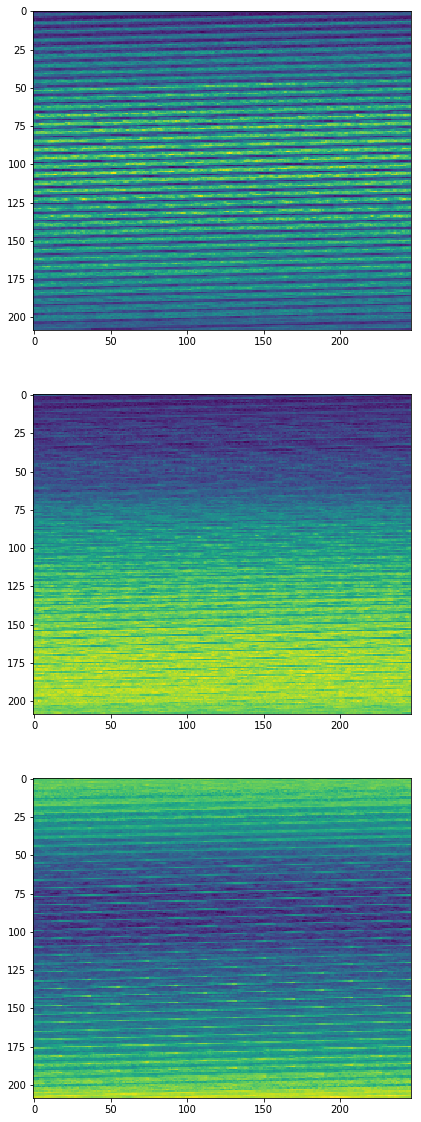

In [128]:
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(40, 20))

ax = [ax1,ax2,ax3]

for i in range(0,sklearn_pca.get_params()['n_components']):
    ax[i].imshow(sklearn_pca.components_[i,:].reshape(m,n))

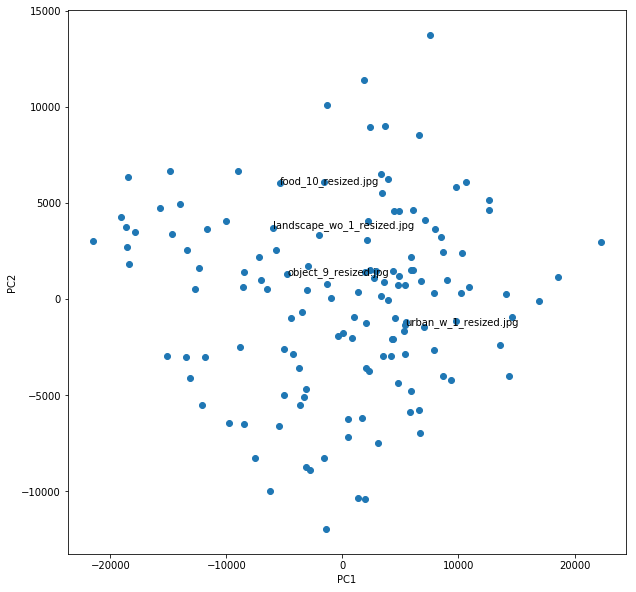

In [129]:
fig, ax = plt.subplots(figsize=(10,10))

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.scatter(Y_sklearn[:,0],Y_sklearn[:,1])


# add labels to some of the points so we can manually go and check them to see differences
for i, txt in enumerate(newlist):
    if(i%40 == 0):
        ax.annotate(txt, (Y_sklearn[i,0],Y_sklearn[i,1]))

In [130]:
bandwidth = estimate_bandwidth(Y_sklearn, quantile=0.2, n_samples=500)
bandwidth

15623.755012474714

In [131]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms

MeanShift(bandwidth=15623.755012474714, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [132]:
ms.fit(Y_sklearn)

MeanShift(bandwidth=15623.755012474714, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [133]:
print(len(np.unique(ms.labels_)))

2


In [134]:
ms.cluster_centers_

array([[ 2.74805894e+03, -7.83600512e+02, -3.19914282e+02,
        -2.06771571e+02, -1.43983338e+01,  2.17199457e+02,
        -1.61852982e+01, -5.99966600e+00, -4.78680769e+01,
        -6.12598227e+01, -3.16444220e+01, -4.44580900e+01,
         3.42163002e+01, -3.67192525e+01, -1.17698848e+01,
        -4.86694082e+01,  6.12389766e+01,  3.04540392e+01,
        -4.97792493e+01, -9.24259841e+01, -1.28774902e+02,
        -3.43904785e+01, -1.03369475e+02, -1.20553187e+02,
        -5.94253668e+01, -6.17888314e+01,  1.45193407e+01,
         1.12132377e+00, -1.02080137e+02, -9.47541098e+01],
       [-7.15525831e+03,  2.19856532e+03, -1.00141843e+03,
         1.06433503e+04,  8.62834164e+03, -6.27403546e+02,
        -4.99451126e+02,  5.28117296e+03, -3.74883185e+03,
        -2.33571501e+03,  4.60207333e+03,  1.06917685e+02,
        -1.05918677e+03, -1.69499594e+02, -2.28423457e+03,
         2.64096949e+03,  2.23638163e+03, -1.98920946e+03,
         2.82342447e+03, -1.11063727e+03,  1.50829473e+

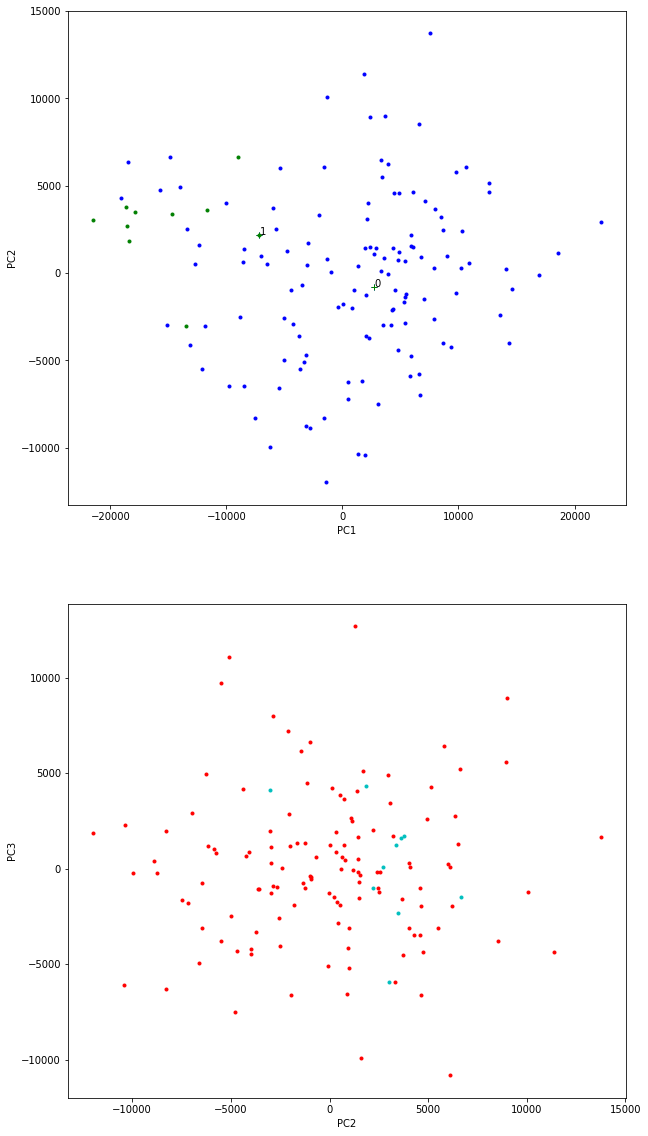

In [135]:
from itertools import cycle

fig, (ax1,ax2) = plt.subplots(2,figsize=(10,20))


colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

# 1st / 2nd PCs
for i in np.unique(ms.labels_):
    c = next(colors)
    ax1.plot(Y_sklearn[ms.labels_==i,0],Y_sklearn[ms.labels_==i,1],c+'.')
    ax1.plot(ms.cluster_centers_[:,0],ms.cluster_centers_[:,1],c+'+')
    ax1.annotate(i, (ms.cluster_centers_[i,0]+10,ms.cluster_centers_[i,1]))
    ax1.set_xlabel("PC1")
    ax1.set_ylabel("PC2")
    
# 2nd / 3rd PCs
for i in np.unique(ms.labels_):
    c = next(colors)
    ax2.plot(Y_sklearn[ms.labels_==i,1],Y_sklearn[ms.labels_==i,2],c + '.')
    ax2.set_xlabel("PC2")
    ax2.set_ylabel("PC3")


In [136]:
from sklearn.cluster import KMeans    

In [137]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(Y_sklearn)

In [138]:
kmeans.labels_

array([2, 0, 2, 2, 1, 3, 1, 2, 2, 1, 0, 2, 0, 1, 0, 0, 3, 2, 1, 0, 2, 2,
       3, 0, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 3, 3,
       2, 0, 0, 1, 0, 3, 0, 2, 0, 0, 3, 2, 2, 2, 0, 1, 0, 2, 2, 3, 2, 1,
       2, 3, 0, 2, 0, 0, 3, 0, 2, 0, 1, 1, 3, 0, 1, 2, 1, 2, 1, 3, 2, 0,
       2, 0, 2, 2, 1, 0, 3, 1, 2, 0, 3, 1, 1, 1, 2, 0, 2, 1, 3, 1, 0, 0,
       0, 1, 0, 2, 3, 0, 2, 2, 1, 2, 1, 1, 3, 0, 3, 0, 0, 0, 0, 2, 1, 3,
       2, 2, 2, 0, 1, 2], dtype=int32)

In [139]:
kmeans.cluster_centers_

array([[-2.95113091e+02, -4.57066517e+03,  7.25296285e+01,
        -3.13623437e+02, -1.51340024e+02,  4.43311662e+02,
         4.85737929e+01,  1.73268699e+02, -4.47759610e+01,
         5.50011614e+02,  1.68411348e+02,  1.15942576e+02,
        -1.74229885e+01,  4.76189316e+01, -2.22628283e+02,
        -3.58465880e+01, -1.80878043e+02,  1.12878050e+02,
         2.15031989e+01, -1.58908291e+02,  1.25218673e+02,
        -9.31365360e+01, -1.89411494e+02, -1.77443022e+02,
        -3.00871019e+01, -6.55356414e+01,  1.05136861e+01,
        -9.52224866e+01, -4.68577474e+01,  5.74783686e+01],
       [-1.22688446e+04,  1.69087345e+03,  3.46464666e+02,
         3.28761331e+02,  1.61451511e+02, -9.84924626e+01,
        -1.20388861e+01, -8.79644973e+01,  2.36711605e+02,
        -4.84488206e+02, -8.32045305e+01, -3.47010612e+01,
        -6.99893692e+01, -9.79099791e+01,  1.12443018e+02,
         2.38978575e+02,  1.50628529e+02, -9.49033209e+01,
        -6.70015531e+01, -8.56518252e+01, -1.99517686e+

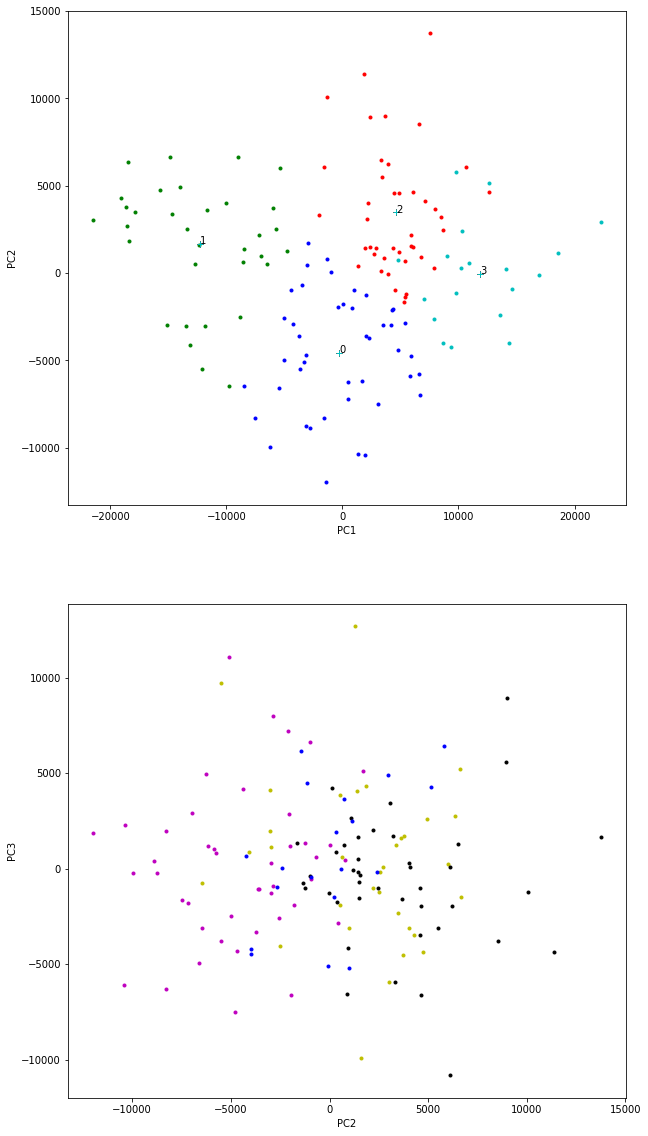

In [140]:
from itertools import cycle

fig, (ax1,ax2) = plt.subplots(2,figsize=(10,20))


colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

# 1st / 2nd PCs
for i in np.unique(kmeans.labels_):
    c = next(colors)
    ax1.plot(Y_sklearn[kmeans.labels_==i,0],Y_sklearn[kmeans.labels_==i,1],c+'.')
    ax1.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c+'+')
    ax1.annotate(i, (kmeans.cluster_centers_[i,0]+10,kmeans.cluster_centers_[i,1]))
    ax1.set_xlabel("PC1")
    ax1.set_ylabel("PC2")
    
# 2nd / 3rd PCs
for i in np.unique(kmeans.labels_):
    c = next(colors)
    ax2.plot(Y_sklearn[kmeans.labels_==i,1],Y_sklearn[kmeans.labels_==i,2],c + '.')
    ax2.set_xlabel("PC2")
    ax2.set_ylabel("PC3")

In [141]:
import pandas as pd
df = pd.DataFrame()

In [142]:
df["image"] = newlist
#df['pca_components'] = Y_sklearn
df['k_means_cluster'] = kmeans.labels_

In [149]:
df.sort_values(by='k_means_cluster', ascending=True)

,image,k_means_cluster,cluster
68,building_2_resized.jpg,0,5
31,group_9_resized.jpg,0,2
33,building_3_resized.jpg,0,2
39,meme_1_resized.jpg,0,2
45,urban_wo_2_resized.jpg,0,4
46,group_3_resized.jpg,0,2
48,promo_6_resized.jpg,0,4
50,meme_8_resized.jpg,0,6
112,promo_2_resized.jpg,0,6
52,group_6_resized.jpg,0,4


In [150]:
df["k_means_cluster"].value_counts()

0    44
2    42
1    33
3    19
Name: k_means_cluster, dtype: int64

In [151]:
df[df["k_means_cluster"]==0]

,image,k_means_cluster,cluster
1,animal_7_resized.jpg,0,4
10,landscape_w_5_resized.jpg,0,2
12,body_6_resized.jpg,0,6
14,candid_1_resized.jpg,0,4
15,urban_wo_4_resized.jpg,0,4
19,urban_wo_1_resized.jpg,0,2
23,food_1_resized.jpg,0,2
25,meme_2_resized.jpg,0,4
26,landscape_wo_2_resized.jpg,0,4
27,animal_2_resized.jpg,0,4


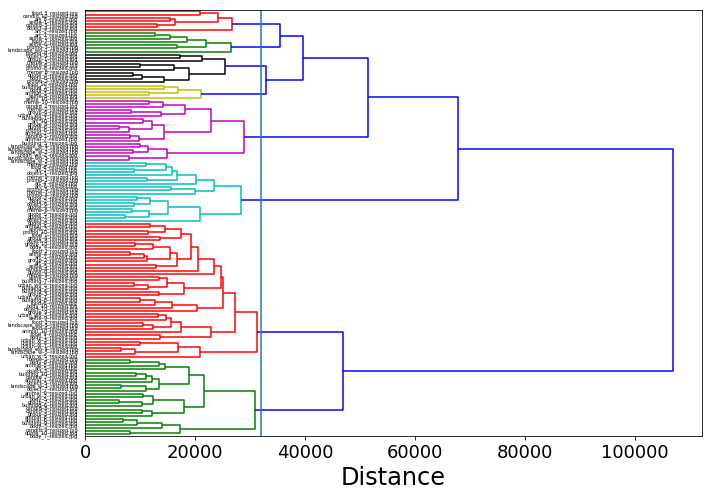

In [152]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from scipy.cluster.hierarchy import fcluster
from matplotlib import pyplot as plt

linked = linkage(Y_sklearn, 'ward')

max_d = 32000
clusters = fcluster(linked, max_d, criterion='distance')
    
df['cluster'] = clusters

labelList = newlist

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,
            show_contracted=True,
            color_threshold=32000)
plt.xlabel('Distance', fontsize=24)
plt.xticks(fontsize = 18)
plt.tight_layout()  # fixes margins

plt.axvline(x=32000) #plot vertical line

plt.show()

In [153]:
clusters

array([2, 4, 7, 1, 3, 1, 3, 1, 8, 3, 2, 2, 6, 5, 4, 4, 1, 2, 3, 2, 2, 2,
       1, 2, 3, 4, 4, 4, 8, 2, 2, 2, 3, 2, 5, 7, 6, 1, 3, 2, 7, 2, 1, 4,
       1, 4, 2, 3, 4, 1, 6, 2, 4, 4, 1, 7, 7, 2, 4, 4, 2, 8, 2, 1, 2, 4,
       8, 2, 5, 2, 4, 6, 1, 2, 2, 4, 5, 3, 1, 6, 6, 1, 3, 2, 3, 1, 8, 4,
       2, 2, 2, 1, 3, 2, 1, 3, 2, 6, 1, 3, 3, 3, 1, 2, 1, 5, 2, 3, 2, 2,
       4, 3, 6, 8, 1, 2, 2, 1, 7, 8, 6, 3, 1, 4, 2, 2, 2, 2, 2, 2, 6, 2,
       1, 2, 1, 4, 3, 7], dtype=int32)

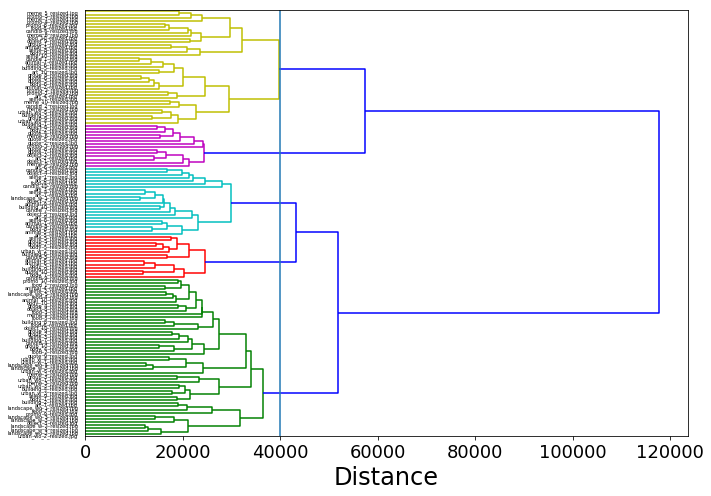

In [154]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from scipy.cluster.hierarchy import fcluster
from matplotlib import pyplot as plt

linked = linkage(img, 'ward')

max_d = 40000
clusters_img = fcluster(linked, max_d, criterion='distance')
    
df['cluster_img'] = clusters_img

labelList = newlist

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,
            show_contracted=True,
            color_threshold=40000)
plt.xlabel('Distance', fontsize=24)
plt.xticks(fontsize = 18)
plt.tight_layout()  # fixes margins

plt.axvline(x=40000) #plot vertical line

plt.show()

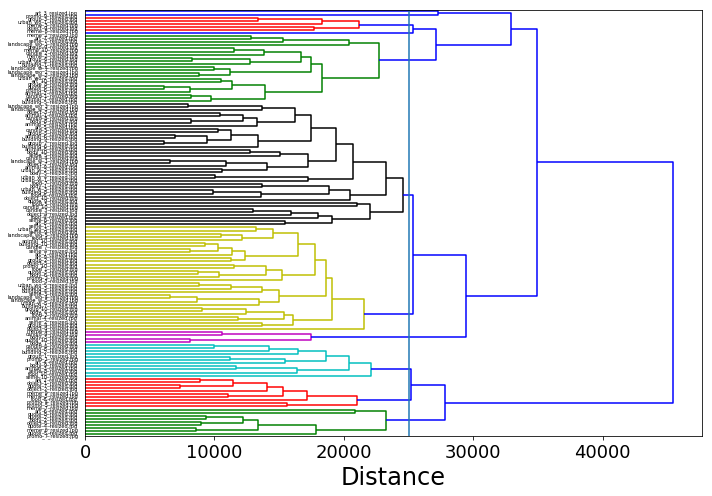

In [155]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from scipy.cluster.hierarchy import fcluster
from matplotlib import pyplot as plt

linked = linkage(Y_sklearn, 'complete')

max_d = 25000
cluster_complete = fcluster(linked, max_d, criterion='distance')
    
df['cluster_complete'] = cluster_complete

labelList = newlist

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,
            color_threshold=25000)
plt.xlabel('Distance', fontsize=24)
plt.xticks(fontsize = 18)
plt.tight_layout()  # fixes margins

plt.axvline(x=25000) #plot vertical line

plt.show()

In [156]:
from sklearn.cluster import AgglomerativeClustering

In [157]:
clustering = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward').fit(Y_sklearn)
clustering 

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=8,
            pooling_func=<function mean at 0x1075a82f0>)

In [158]:
clustering.labels_

array([0, 3, 6, 1, 2, 1, 2, 1, 5, 2, 0, 0, 4, 7, 3, 3, 1, 0, 2, 0, 0, 0,
       1, 0, 2, 3, 3, 3, 5, 0, 0, 0, 2, 0, 7, 6, 4, 1, 2, 0, 6, 0, 1, 3,
       1, 3, 0, 2, 3, 1, 4, 0, 3, 3, 1, 6, 6, 0, 3, 3, 0, 5, 0, 1, 0, 3,
       5, 0, 7, 0, 3, 4, 1, 0, 0, 3, 7, 2, 1, 4, 4, 1, 2, 0, 2, 1, 5, 3,
       0, 0, 0, 1, 2, 0, 1, 2, 0, 4, 1, 2, 2, 2, 1, 0, 1, 7, 0, 2, 0, 0,
       3, 2, 4, 5, 1, 0, 0, 1, 6, 5, 4, 2, 1, 3, 0, 0, 0, 0, 0, 0, 4, 0,
       1, 0, 1, 3, 2, 6])

In [159]:
df["hierarchical_cluster(8)"] = clustering.labels_

In [160]:
from sklearn.cluster import SpectralClustering

In [161]:
spectral_clustering = SpectralClustering(n_clusters=4,
         assign_labels="discretize",
         random_state=0).fit(Y_sklearn)

df["spectral_clustering"] = spectral_clustering.labels_

spectral_clustering 

/Users/jeffreysternberg/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


SpectralClustering(affinity='rbf', assign_labels='discretize', coef0=1,
          degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=4, n_init=10, n_jobs=1,
          n_neighbors=10, random_state=0)

In [162]:
df.sort_values(by= 'hierarchical_cluster(8)', ascending=True)

,image,k_means_cluster,cluster,cluster_img,cluster_complete,hierarchical_cluster(8),spectral_clustering
0,urban_w_1_resized.jpg,2,2,1,6,0,2
39,meme_1_resized.jpg,0,2,1,9,0,1
131,object_10_resized.jpg,3,2,1,6,0,0
41,food_2_resized.jpg,2,2,1,5,0,3
46,group_3_resized.jpg,0,2,1,8,0,0
51,object_8_resized.jpg,2,2,1,5,0,3
129,body_10_resized.jpg,2,2,1,6,0,1
57,selfie_2_resized.jpg,2,2,1,5,0,1
60,landscape_wo_4_resized.jpg,0,2,1,5,0,2
124,building_8_resized.jpg,3,2,1,6,0,1


In [169]:
cluster = df[df["cluster"]==1].sort_values(by= 'image', ascending=True)
cluster_1 = cluster['image'].tolist()

In [170]:
cluster_1

['animal_1_resized.jpg',
 'animal_5_resized.jpg',
 'animal_6_resized.jpg',
 'animal_8_resized.jpg',
 'animal_9_resized.jpg',
 'art_5_resized.jpg',
 'body_3_resized.jpg',
 'body_5_resized.jpg',
 'body_7_resized.jpg',
 'body_8_resized.jpg',
 'building_10_resized.jpg',
 'building_6_resized.jpg',
 'building_9_resized.jpg',
 'candid_5_resized.jpg',
 'candid_7_resized.jpg',
 'candid_8_resized.jpg',
 'candid_9_resized.jpg',
 'group_5_resized.jpg',
 'group_7_resized.jpg',
 'landscape_w_1_resized.jpg',
 'object_3_resized.jpg',
 'object_5_resized.jpg',
 'object_7_resized.jpg',
 'quote_10_resized.jpg',
 'urban_w_2_resized.jpg']

In [171]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img= []
for image in cluster_1:
    img.append(io.imread("image_samples_resized/" +image))
    #img = io.imread("image_samples_resized/" +image)
    #img = mpimg.imread(image)
    #plt.imshow(io.imread("image_samples_resized/" +image))

In [172]:
len(img)

25

In [173]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [174]:
show_images(img, cols = 3, titles = cluster_1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
